In [1]:
%reset

Once deleted, variables cannot be recovered. Proceed (y/[n])? y


In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline

import re
import unidecode
from wordcloud import WordCloud, STOPWORDS

In [2]:
df = pd.read_csv('TRABAJOPOLIS_FEB2019.csv',encoding='latin-1', sep=",")

In [3]:
df

,Nombre_Empresa,Id_Empleo,Ciudad,Categoria,Sueldo,Publicado,Vencimiento,Descripcion,Nombre_cargo,Enlace
0,Empresa de Servicios a Nivel Nacional,717052,"Sucre, Bolivia","Administración y Oficina,Dirección y Gerencia",No Declarado,05 Febrero 2019,07 Marzo 2019,importante empresa comercial busca incorporar ...,Coordinador(a) de Sucursal - Sucre,https://www.trabajopolis.bo/oferta-de-trabajo-...
1,Digital Tv Cable,717036,"Santa Cruz de la Sierra, Bolivia","Administración y Oficina,Atención al Cliente",Dependiendo de la Experiencia,05 Febrero 2019,07 Marzo 2019,digital tv cable internet esta buscando talen...,COORDINADOR (A) DE CALL CENTER Y ATC,https://www.trabajopolis.bo/oferta-de-trabajo-...
2,Electro Hogar S.R.L.,717026,"Santa Cruz de la Sierra, Bolivia",Administración y Oficina,De Bs. 2.060 a Bs. 2.999,05 Febrero 2019,07 Marzo 2019,secretaria recepcionista formacion conocimien...,Secretaria Recepcionista,https://www.trabajopolis.bo/oferta-de-trabajo-...
3,Cooperativa de Ahorro y Crédito Abierta Jesús ...,717041,"Sucre, Bolivia",Administración y Oficina,No Declarado,05 Febrero 2019,07 Marzo 2019,ejecutivo de negociosede chuquisacaformacionfo...,Ejecutivo(a) de Negocio - Chuquisaca,https://www.trabajopolis.bo/oferta-de-trabajo-...
4,Canedo Strampfer Consultores SRL,716469,"Cochabamba, Bolivia",Arquitectura,Negociable,05 Febrero 2019,07 Marzo 2019,arquitectofunciones elaboracion de planos calc...,Arquitecto(a),https://www.trabajopolis.bo/oferta-de-trabajo-...
...,...,...,...,...,...,...,...,...,...,...
11188,Cazatalentos SRL,801346,"Santa Cruz de la Sierra, Bolivia",Banca y Finanzas,No Declarado,18 Noviembre 2019,18 Diciembre 2019,cazatalentos selecciona para importante empres...,Encargado(a) de Inventarios,https://www.trabajopolis.bo/oferta-de-trabajo-...
11189,Dagro Inversiones Hoteleras SRL,801511,"Otra Ciudad de Bolivia, Bolivia",Turismo y HotelerÃ­a,No Declarado,18 Noviembre 2019,18 Diciembre 2019,empresa turistica requiere incorporar para su ...,Masajista - Uyuni,https://www.trabajopolis.bo/oferta-de-trabajo-...
11190,Maria Fernanda Roca (Coaching & Reclutamiento),801523,"Cochabamba, Bolivia","AdministraciÃ³n y Oficina,Contabilidad y Econo...",No Declarado,18 Noviembre 2019,18 Diciembre 2019,nuestro cliente prestigiosa empresa de consumo...,Jefe de CrÃ©ditos y Cobranzas - Cochabamba,https://www.trabajopolis.bo/oferta-de-trabajo-...
11191,Empresa Comercial,808609,"La Paz, Bolivia",Medicina y Salud,No Declarado,18 Noviembre 2019,18 Diciembre 2019,importante corporacion de la salud con presenc...,Responsable FarmacÃ©utico y AlmacÃ©n - La Paz,https://www.trabajopolis.bo/oferta-de-trabajo-...


In [4]:
df.Id_Empleo.unique().shape

(6167,)

In [5]:
df_new = df.drop_duplicates(subset ="Id_Empleo") 

In [6]:
df_new.set_index('Id_Empleo', verify_integrity = True, inplace = True)

In [7]:
df_new['Publicado'].value_counts()

14 Noviembre 2019    71
11 Enero 2019        67
04 Febrero 2019      60
08 Enero 2019        60
15 Noviembre 2019    60
                     ..
17 Febrero 2019       1
24 Noviembre 2019     1
28 Abril 2019         1
27 Enero 2019         1
24 Febrero 2019       1
Name: Publicado, Length: 213, dtype: int64

In [8]:
df_new['Sueldo'].value_counts()

No Declarado                      4748
Dependiendo de la Experiencia      282
De Bs. 3.000 a Bs. 3.999           279
De Bs. 2.060 a Bs. 2.999           203
De Bs. 2.122 a Bs. 2.999           182
Negociable                         180
De Bs. 4.000 a Bs. 4.999           112
De Bs. 5.000 a Bs. 5.999            51
De Bs. 6.000 a Bs. 6.999            37
De Bs. 10.000 a Bs. 14.999          33
De Bs. 7.000 a Bs. 7.999            20
De Bs. 8.000 a Bs. 8.999            18
De Bs. 9.000 a Bs. 9.999            16
De Bs. 15.000 a Bs. 19.999           4
Mayores a Bs. 20.000                 2
Name: Sueldo, dtype: int64

In [9]:
df_new['Nombre_Empresa'].value_counts().head(10)

Importante Empresa                          221
INSTITUCION DE INTERMEDIACION FINANCIERA    178
Banco Fassil - Trabaje con Nosotros         149
Banco Pyme Ecofuturo S.A.                   131
Empresa Comercial                           101
Importante Empresa Comercial                 92
Importante Empresa Industrial                80
Empresa Industrial                           80
Grupo Nacional Vida                          68
INDUSTRIAS FERROTODO LTDA.                   64
Name: Nombre_Empresa, dtype: int64

In [10]:
df_new['Ciudad'].value_counts()

Santa Cruz de la Sierra, Bolivia      3564
La Paz, Bolivia                       1331
Cochabamba, Bolivia                    745
Tarija, Bolivia                        114
El Alto, Bolivia                       110
Sucre, Bolivia                          79
Oruro, Bolivia                          76
PotosÃ­, Bolivia                        70
Trinidad, Bolivia                       30
Otra Ciudad de Bolivia, Bolivia         24
Potosí, Bolivia                         17
Cobija, Bolivia                          6
Otra Ciudad Extranjera, Otro PaÃ­s       1
Name: Ciudad, dtype: int64

In [11]:
def column2text(feature):
    new_list = []
    # Separate by colon
    for element in feature:
        if ',' in element:
            tmp = element.split(',')
            new_list.append(tmp[0].rstrip())
            new_list.append(tmp[1].rstrip())
        #else:
         #   new_categorias.append(element)
    # Merge all elements of list into a text        
    txt = ''
    for element in new_list:
        txt = txt + element + ' '
    # Clean text
    text = txt.lower().replace('\n','') #Get items without \n
    text = re.sub("(\(\w+\))", '', text) #Delete parenthesis
    #text = unidecode.unidecode(text) #Delete accents
    #text = re.sub('[^A-Za-z0-9\s]','',text) #Delete anything but letters, numbers and spaces
    clean_text = text.replace('  ', ' ')
    return clean_text

In [12]:
df_new['Nombre_cargo'].value_counts().head()

Ejecutivo(a) de Ventas                 92
Auxiliar Contable                      66
Contador(a)                            40
Ejecutivo(a) de Ventas - Santa Cruz    39
Recepcionista                          35
Name: Nombre_cargo, dtype: int64

In [13]:
clean_text = column2text(df_new['Categoria'])

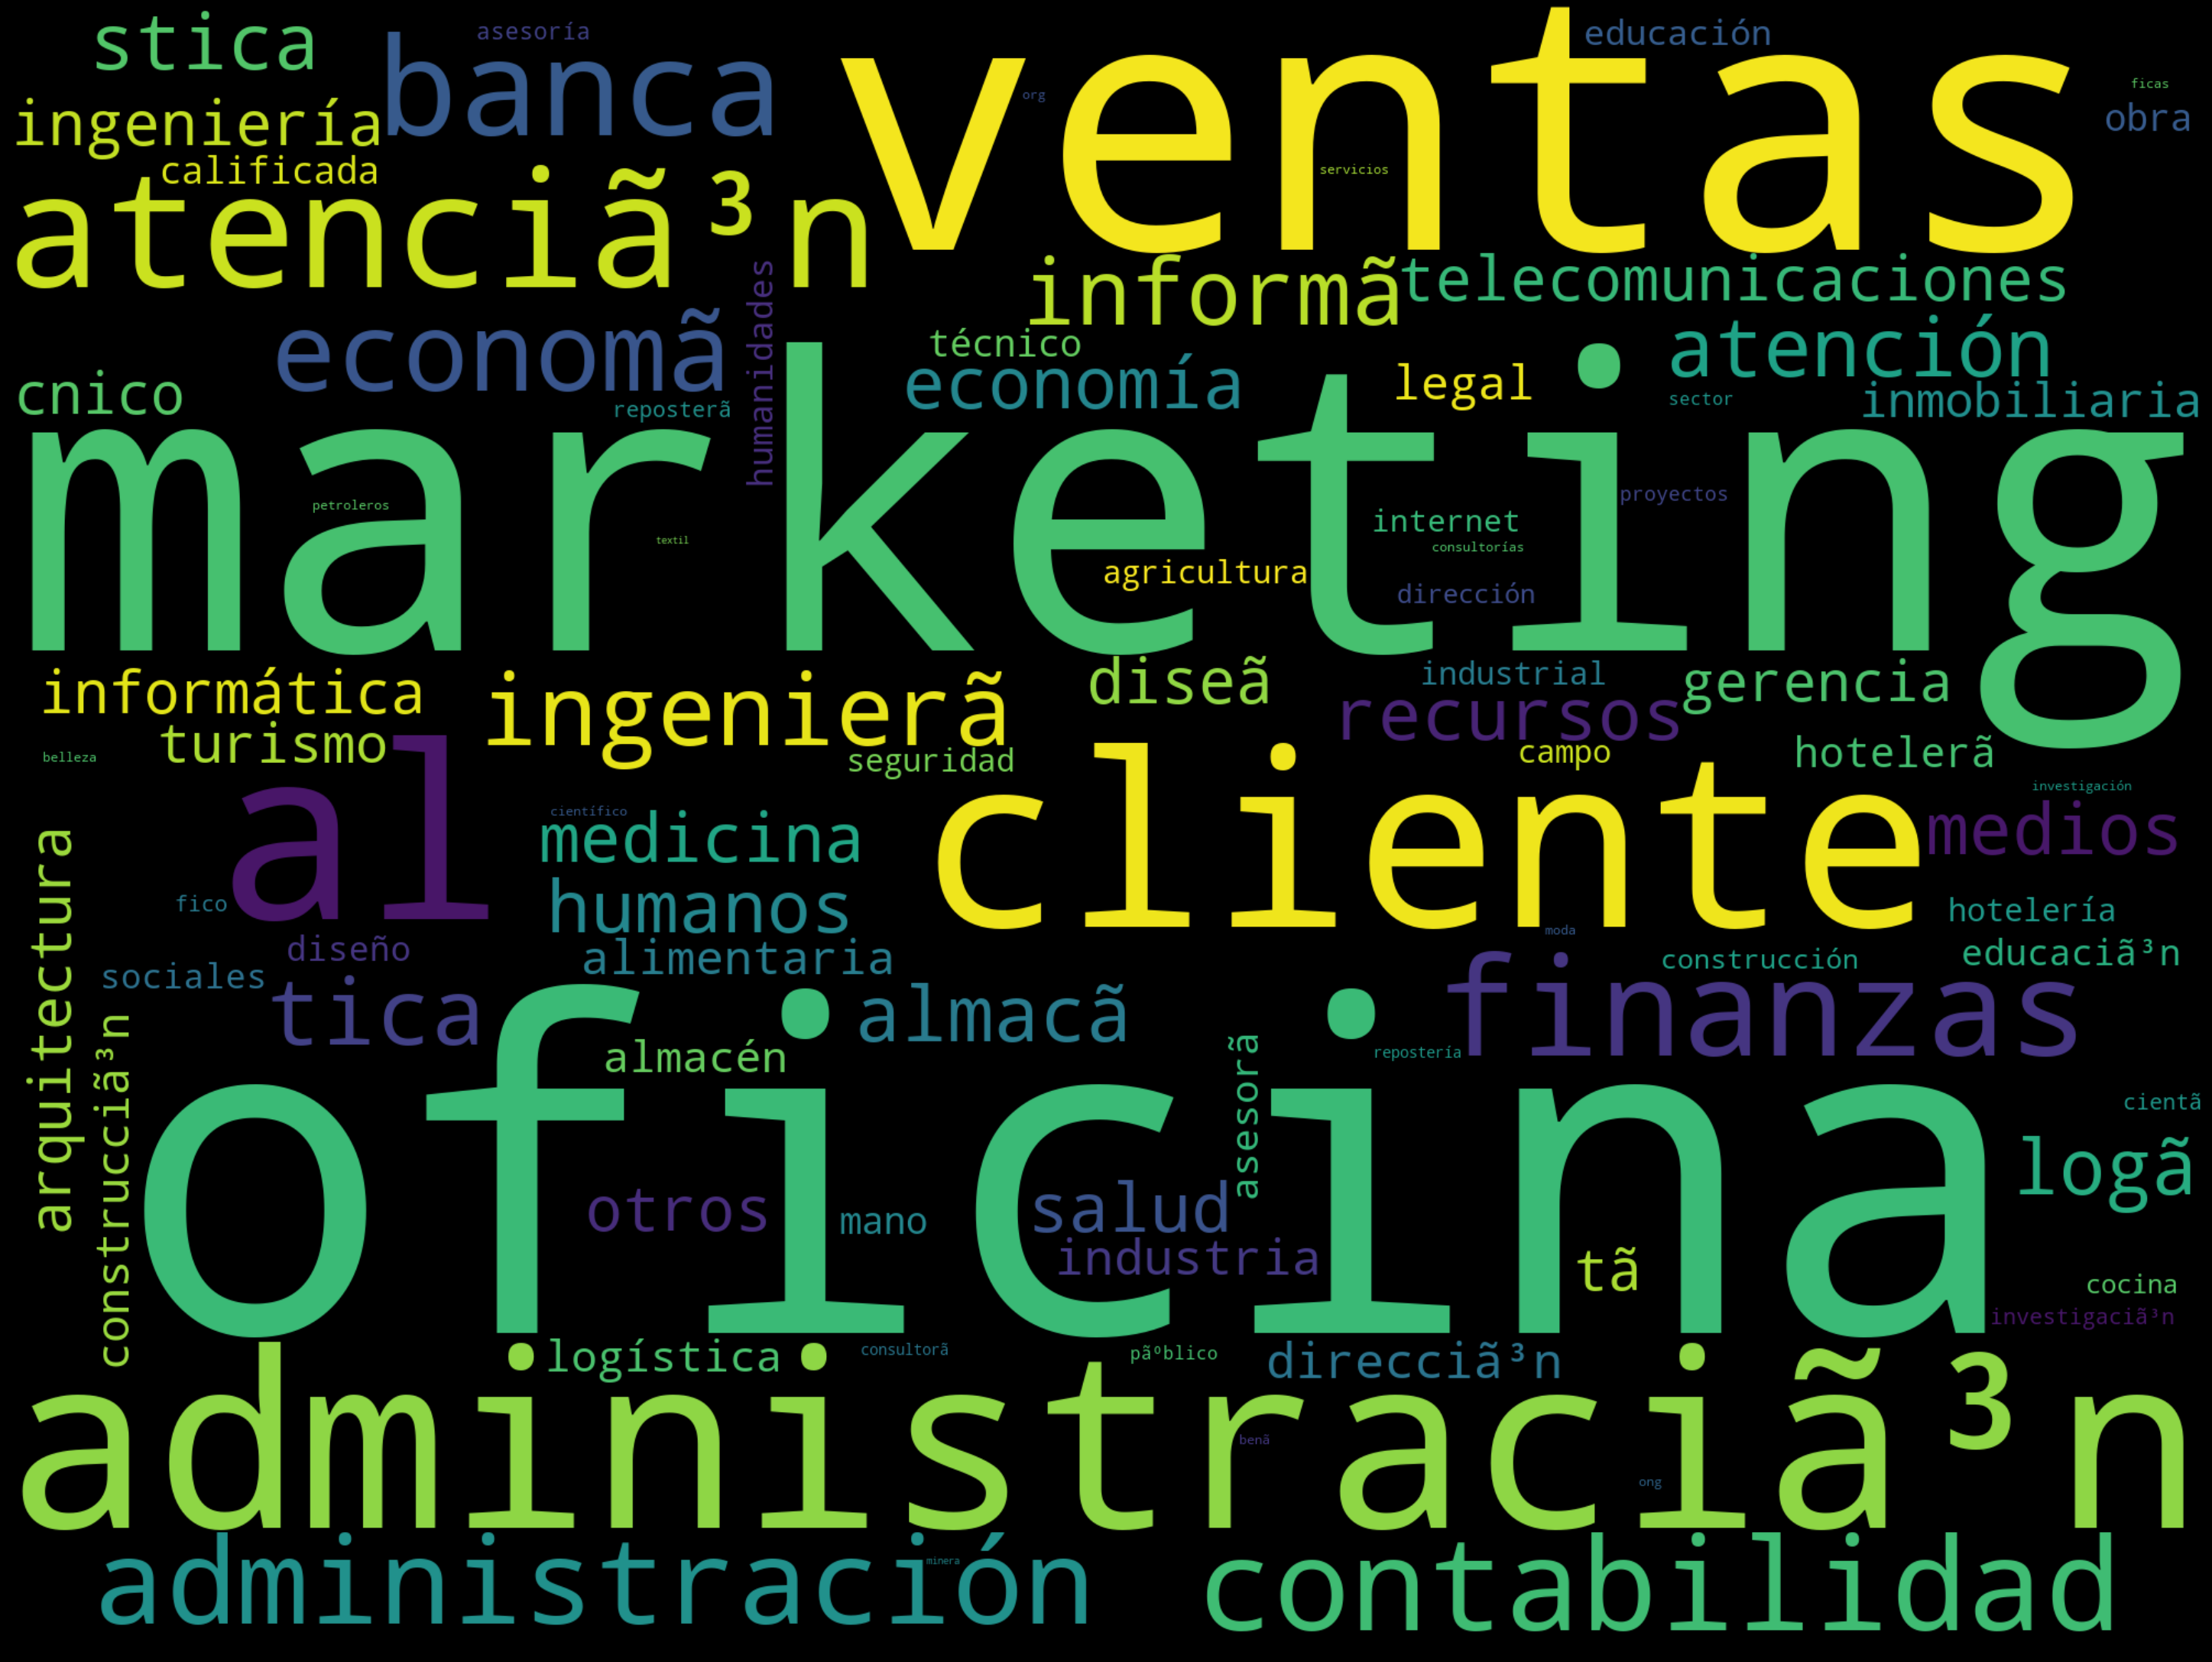

In [14]:
wordcloud = WordCloud(
    collocations=False,
    width = 2000,
    height = 1500,
    background_color = 'black',
    stopwords = STOPWORDS).generate(str(clean_text))
fig = plt.figure(
    figsize = (40, 30),
    facecolor = 'k',
    edgecolor = 'k')
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

In [15]:
nombres_cargos = column2text(df_new['Nombre_cargo'])

In [15]:
#set the stopwords list
stopwords= set(STOPWORDS)

#append new words to the stopwords list
new_words = {'de', 'al', 'santa', 'cruz', 'cochabamba', 'la', 'paz'}
new_stopwords=stopwords.union(new_words)

wordcloud = WordCloud(
    collocations=False,
    width = 2000,
    height = 1500,
    background_color = 'black',
    stopwords = new_stopwords).generate(str(nombres_cargos))
fig = plt.figure(
    figsize = (40, 30),
    facecolor = 'k',
    edgecolor = 'k')
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

NameError: name 'nombres_cargos' is not defined

ver qué dias publican más publicidad?
en qué mes?
de los informaticos, cuantos son en banca?
eliminar stopwords espanol

If informatica:
    descripcion = 
    wordCloud(descripcion)